In [1]:
%load_ext watermark

In [2]:
%watermark -a 'lty' -d -v -p numpy,pandas,matplotlib,scripy,sklearn 

Missing colon in file WindowsPath('d:/ProgramData/Anaconda3/envs/learn-ml/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 256 ('<!-- #font.family:  sans-serif -->')
Missing colon in file 'd:\\ProgramData\\Anaconda3\\envs\\learn-ml\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc', line 256 ('<!-- #font.family:  sans-serif -->')


Author: lty

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 7.31.1

numpy     : 1.21.5
pandas    : 1.3.5
matplotlib: 3.5.1
scripy    : not installed
sklearn   : 1.0.2



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X, y = digits.data, digits.target
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [4]:
gnb = GaussianNB().fit(Xtrain,Ytrain)
#查看分数
acc_score = gnb.score(Xtest,Ytest)
acc_score

0.8592592592592593

In [5]:
#查看预测结果
Y_pred = gnb.predict(Xtest)
Y_pred

array([6, 1, 3, 0, 4, 5, 0, 8, 3, 8, 6, 8, 7, 8, 8, 8, 5, 9, 5, 6, 5, 4,
       7, 4, 8, 2, 7, 2, 8, 9, 2, 8, 3, 6, 0, 3, 8, 8, 1, 5, 2, 8, 8, 9,
       2, 2, 0, 7, 3, 6, 7, 2, 8, 0, 5, 4, 1, 9, 4, 0, 5, 8, 9, 1, 7, 8,
       7, 5, 8, 2, 4, 4, 8, 2, 6, 1, 2, 1, 7, 8, 8, 5, 9, 4, 3, 6, 9, 7,
       4, 2, 4, 8, 0, 5, 7, 7, 7, 4, 7, 8, 8, 7, 0, 7, 2, 1, 9, 9, 8, 7,
       1, 5, 1, 8, 0, 4, 8, 9, 5, 6, 4, 8, 3, 8, 0, 6, 8, 6, 7, 6, 1, 8,
       5, 0, 8, 2, 1, 8, 8, 6, 6, 0, 2, 4, 7, 8, 9, 5, 9, 4, 7, 8, 8, 6,
       7, 0, 8, 4, 7, 2, 2, 6, 4, 4, 1, 0, 3, 4, 3, 8, 7, 0, 6, 9, 7, 5,
       5, 3, 6, 1, 6, 6, 2, 3, 8, 2, 7, 3, 1, 1, 6, 8, 8, 8, 7, 7, 2, 5,
       0, 0, 8, 6, 6, 7, 6, 0, 7, 5, 5, 8, 4, 6, 5, 1, 5, 1, 9, 6, 8, 8,
       8, 2, 4, 8, 6, 5, 9, 9, 3, 1, 9, 1, 3, 3, 5, 5, 7, 7, 4, 0, 9, 0,
       9, 9, 6, 4, 3, 4, 8, 1, 0, 2, 9, 7, 6, 8, 8, 0, 6, 0, 1, 7, 1, 9,
       5, 4, 6, 8, 1, 5, 7, 7, 5, 1, 0, 0, 9, 3, 9, 1, 6, 3, 7, 2, 7, 1,
       9, 9, 8, 3, 3, 5, 7, 7, 7, 3, 9, 5, 0, 7, 5,

In [6]:
prob = gnb.predict_proba(Xtest)
prob.shape

(540, 10)

In [7]:
prob[1,:].sum()

1.000000000000003

In [8]:
prob.sum(axis=1).shape

(540,)

In [9]:
# 混淆举证
from sklearn.metrics import confusion_matrix


In [10]:
confusion_matrix(Ytest,Y_pred)
# #注意，ROC曲线是不能用于多分类的。多分类状况下最佳的模型评估指标是混淆矩阵和整体的准确度

array([[47,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 46,  2,  0,  0,  0,  0,  3,  6,  2],
       [ 0,  2, 35,  0,  0,  0,  1,  0, 16,  0],
       [ 0,  0,  1, 40,  0,  1,  0,  3,  4,  0],
       [ 0,  0,  1,  0, 39,  0,  1,  4,  0,  0],
       [ 0,  0,  0,  2,  0, 58,  1,  1,  1,  0],
       [ 0,  0,  1,  0,  0,  1, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  2, 55,  0],
       [ 1,  1,  0,  1,  2,  0,  0,  3,  7, 41]], dtype=int64)

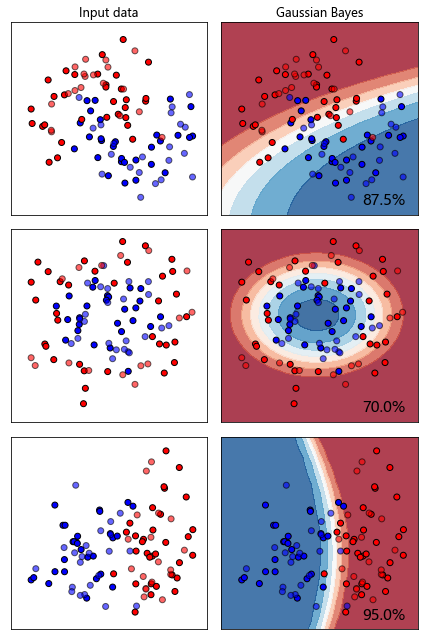

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,ComplementNB

h = .02
names = ["Multinomial","Gaussian","Bernoulli","Complement"]
classifiers = [MultinomialNB(),GaussianNB(),BernoulliNB(),ComplementNB()]
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
             random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
figure = plt.figure(figsize=(6, 9))
i = 1
for ds_index, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, 
random_state=42)
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    array1,array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2),
                 np.arange(x2_min, x2_max, 0.2))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), 2, i)
    if ds_index == 0:
            ax.set_title("Input data")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
             cmap=cm_bright,edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, 
             cmap=cm_bright, alpha=0.6,edgecolors='k')
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    ax = plt.subplot(len(datasets),2,i)
    clf = GaussianNB().fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    Z = clf.predict_proba(np.c_[array1.ravel(),array2.ravel()])[:, 1]
    Z = Z.reshape(array1.shape)
    ax.contourf(array1, array2, Z, cmap=cm, alpha=.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
             edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                 edgecolors='k', alpha=0.6)
    
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_index == 0:
        ax.set_title("Gaussian Bayes")
        
    ax.text(array1.max() - .3, array2.min() + .3, ('{:.1f}%'.format(score*100)),
        size=15, horizontalalignment='right')
    i += 1
plt.tight_layout()
plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from time import time
import datetime

In [13]:
def plot_learning_curve(estimator,title, X, y, 
                ax, #选择子图
                ylim=None, #设置纵坐标的取值范围
                cv=None, #交叉验证
                n_jobs=None #设定索要使用的线程
             ):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
             ,cv=cv,n_jobs=n_jobs)
    # train_sizes 训练样本数量 
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #显示网格作为背景，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
         , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
         , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

In [14]:
digits = load_digits()
X, y = digits.data, digits.target
X.shape
X #是一个稀疏矩阵
title = ["Naive Bayes","DecisionTree","SVM, RBF kernel","RandomForest","Logistic"] 
model = [GaussianNB(),DTC(),SVC(gamma=0.001)
        ,RFC(n_estimators=50),LR(C=.1,solver="lbfgs")]
cv = ShuffleSplit(n_splits=50,  # 数据分为多少份
                  test_size=0.2,  # 测试集大小
                  random_state=0)

In [15]:
fig, axes = plt.subplots(1,5,figsize=(30,6))
for ind,title_,estimator in zip(range(len(title)),title,model):
    times = time()
    plot_learning_curve(estimator, title_, X, y,
                    ax=axes[ind], ylim = [0.7, 1.05],n_jobs=4, cv=cv)
    print("{}:{}".format(title_,datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))
plt.show()

### 布利尔分数 Brier Score

In [ ]:
from sklearn.metrics import brier_score_loss

In [ ]:
prob[:,1]

array([4.69391744e-052, 1.00000000e+000, 0.00000000e+000, 4.85631854e-065,
       1.08116768e-048, 3.27965387e-054, 3.99747326e-064, 2.45452857e-024,
       4.16024460e-222, 2.42237224e-019, 2.97238063e-014, 5.29039085e-045,
       2.26615283e-049, 2.39822705e-064, 3.20887775e-026, 2.15521140e-154,
       1.04958623e-071, 5.12031407e-006, 3.52609849e-035, 1.09434137e-038,
       3.65878202e-029, 2.69613168e-022, 5.27643267e-063, 1.15411576e-035,
       0.00000000e+000, 3.78662313e-015, 1.18978598e-127, 4.46689309e-058,
       4.07698265e-071, 2.98472782e-031, 0.00000000e+000, 2.77530248e-011,
       6.10320836e-069, 1.85700085e-066, 2.04608092e-065, 5.48759891e-024,
       7.57998139e-021, 2.16879233e-060, 1.00000000e+000, 2.39682348e-019,
       6.38427279e-015, 2.70871462e-009, 1.76003929e-028, 1.79349059e-023,
       2.70467033e-036, 5.68591136e-294, 5.17917492e-054, 1.70233343e-050,
       1.65015083e-029, 2.19316389e-060, 1.47026623e-077, 2.67054937e-088,
       3.03804107e-003, 1

In [ ]:
# brier_score_loss(Ytest, prob[:,1], pos_label=1)

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR


In [ ]:
logi = LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto").fit(Xtrain,Ytrain)
svc = SVC(kernel = "linear",gamma=1).fit(Xtrain,Ytrain)

d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# brier_score_loss(Ytest,logi.predict_proba(Xtest)[:,1],pos_label=1)
# #由于SVC的置信度并不是概率，为了可比性，我们需要将SVC的置信度“距离”归一化，压缩到[0,1]之间
# svc_prob = (svc.decision_function(Xtest) -
# svc.decision_function(Xtest).min())/(svc.decision_function(Xtest).max() -
# svc.decision_function(Xtest).min())
# brier_score_loss(Ytest,svc_prob[:,1],pos_label=1)

In [ ]:
# import pandas as pd
# name = ["Bayes","Logistic","SVC"]
# color = ["red","black","orange"]
# df = pd.DataFrame(index=range(10),columns=name)
# for i in range(10):
#     df.loc[i,name[0]] = brier_score_loss(Ytest,prob[:,i],pos_label=i)
#     df.loc[i,name[1]] = brier_score_loss(Ytest,logi.predict_proba(Xtest)
# [:,i],pos_label=i)
#     df.loc[i,name[2]] = brier_score_loss(Ytest,svc_prob[:,i],pos_label=i)
# for i in range(df.shape[1]):
#     plt.plot(range(10),df.iloc[:,i],c=color[i])
# plt.legend()
# plt.show()

In [ ]:
svc_prob = (svc.decision_function(Xtest) )

In [ ]:
from sklearn.metrics import log_loss
log_loss(Ytest,prob)

2.4725653911460683

In [ ]:
log_loss(Ytest,logi.predict_proba(Xtest))

0.12746760772557794

In [ ]:
log_loss(Ytest,svc_prob)

2.187539942849393

### 可靠性曲线Reliability Curve

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification as mc
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import train_test_split

In [ ]:
X, y = mc(n_samples=100000,n_features=20 #总共20个特征
        ,n_classes=2 #标签为2分类
        ,n_informative=2 #其中两个代表较多信息
        ,n_redundant=10 #10个都是冗余特征
        ,random_state=42)
#样本量足够大，因此使用1%的样本作为训练集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y
                 ,test_size=0.99
                 ,random_state=42)
Xtrain
np.unique(Ytrain)

array([0, 1])

In [ ]:
gnb = GaussianNB()
gnb.fit(Xtrain,Ytrain)
y_pred = gnb.predict(Xtest)
prob_pos = gnb.predict_proba(Xtest)[:,1] #我们的预测概率 - 横坐标
#Ytest - 我们的真实标签 - 横坐标
#在我们的横纵表坐标上，概率是由顺序的（由小到大），为了让图形规整一些，我们要先对预测概率和真实标签按照预测
# 概率进行一个排序，这一点我们通过DataFrame来实现
df = pd.DataFrame({"ytrue":Ytest[:500],"probability":prob_pos[:500]})

In [ ]:
df

,ytrue,probability
0,1,9.999997e-01
1,0,9.999964e-01
2,1,1.000000e+00
3,1,9.886612e-01
4,0,8.441773e-18
...,...,...
495,0,9.224911e-04
496,1,9.931903e-01
497,0,5.670253e-06
498,0,8.248345e-08


In [ ]:
df = df.sort_values(by="probability")
df.index = range(df.shape[0])
df

,ytrue,probability
0,0,1.824809e-21
1,0,6.610435e-21
2,0,4.171566e-19
3,0,8.441773e-18
4,0,1.463199e-17
...,...,...
495,1,1.000000e+00
496,1,1.000000e+00
497,1,1.000000e+00
498,1,1.000000e+00


In [ ]:
clf_score = gnb.score(Xtest,Ytest)

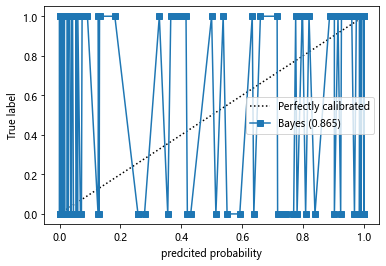

In [ ]:
#紧接着我们就可以画图了
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated") #得做一条对角线来对比呀
ax1.plot(df["probability"],df["ytrue"],"s-",label="%s (%1.3f)" % ("Bayes", clf_score))
ax1.set_ylabel("True label")
ax1.set_xlabel("predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

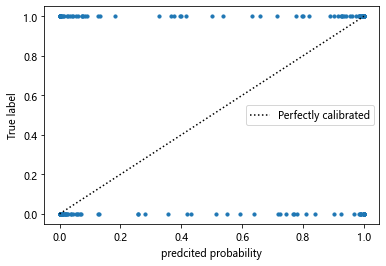

In [ ]:
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated") #得做一条对角线来对比呀
ax1.scatter(df["probability"],df["ytrue"],s=10)
ax1.set_ylabel("True label")
ax1.set_xlabel("predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

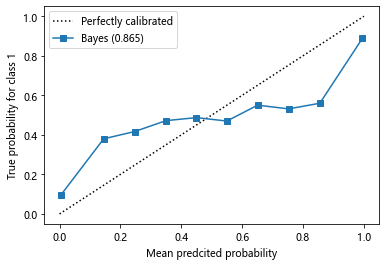

In [ ]:
from sklearn.calibration import calibration_curve
#从类calibiration_curve中获取横坐标和纵坐标
trueproba, predproba = calibration_curve(Ytest, prob_pos
                 ,n_bins=10 #输入希望分箱的个数
                    )
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.plot(predproba, trueproba,"s-",label="%s (%1.3f)" % ("Bayes", clf_score))
ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

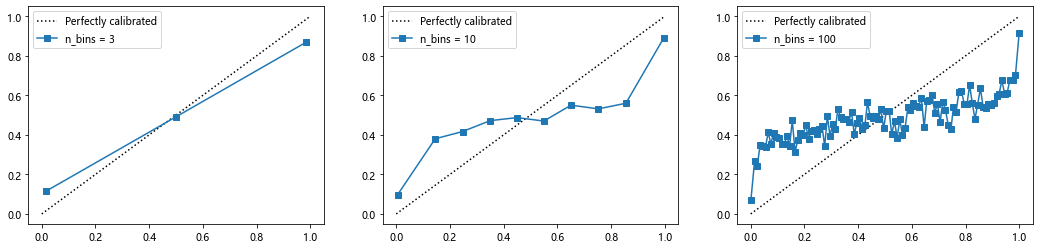

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(18,4))
for ind,i in enumerate([3,10,100]):
    ax = axes[ind]
    ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=i)
    ax.plot(predproba, trueproba,"s-",label="n_bins = {}".format(i))
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean predcited probability")
    ax1.set_ylim([-0.05, 1.05])
    ax.legend()
plt.show()

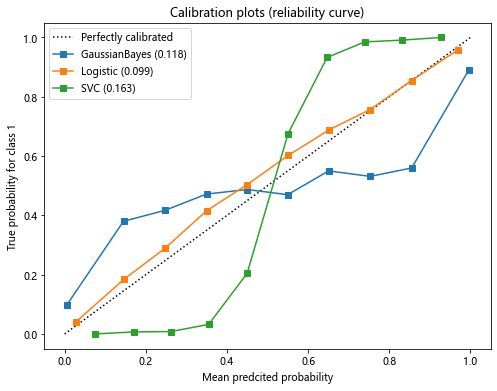

In [ ]:
name = ["GaussianBayes","Logistic","SVC"]
gnb = GaussianNB()
logi = LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto")
svc = SVC(kernel = "linear",gamma=1)
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name_ in zip([gnb,logi,svc],name):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    #hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:,1]
    else:
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    #返回布里尔分数
    clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
    trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=10)
    ax1.plot(predproba, trueproba,"s-",label="%s (%1.3f)" % (name_, clf_score))
        
ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
ax1.set_title('Calibration plots (reliability curve)')
plt.show()

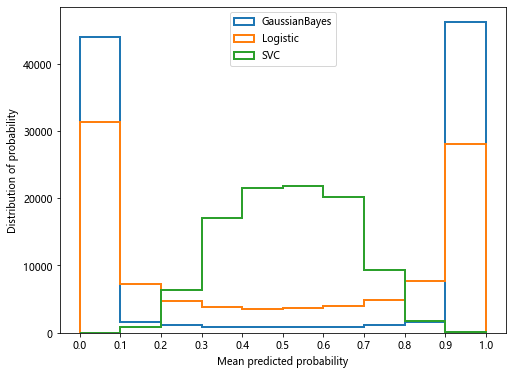

In [ ]:
fig, ax2 = plt.subplots(figsize=(8,6))
for clf, name_ in zip([gnb,logi,svc],name):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    #hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:,1]
    else:
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    ax2.hist(prob_pos
         ,bins=10
         ,label=name_
         ,histtype="step" #设置直方图为透明
         ,lw=2 #设置直方图每个柱子描边的粗细
         )

ax2.set_ylabel("Distribution of probability")
ax2.set_xlabel("Mean predicted probability")
ax2.set_xlim([-0.05, 1.05])
ax2.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax2.legend(loc=9)
plt.show()

In [ ]:
def plot_calib(models,name,Xtrain,Xtest,Ytrain,Ytest,n_bins=10):
    
    import matplotlib.pyplot as plt
    from sklearn.metrics import brier_score_loss
    from sklearn.calibration import calibration_curve
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name_ in zip(models,name):
        clf.fit(Xtrain,Ytrain)
        y_pred = clf.predict(Xtest)
        #hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(Xtest)[:,1]
        else:
            prob_pos = clf.decision_function(Xtest)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        #返回布里尔分数
        clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
        trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=n_bins)
        ax1.plot(predproba, trueproba,"s-",label="%s (%1.3f)" % (name_, clf_score))
        ax2.hist(prob_pos, range=(0, 1), bins=n_bins, label=name_,histtype="step",lw=2)
        
    ax2.set_ylabel("Distribution of probability")
    ax2.set_xlabel("Mean predicted probability")
    ax2.set_xlim([-0.05, 1.05])
    ax2.legend(loc=9)
    ax2.set_title("Distribution of probablity")
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean predcited probability")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend()
    ax1.set_title('Calibration plots(reliability curve)')
    plt.show()

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
name = ["GaussianBayes","Logistic","Bayes+isotonic","Bayes+sigmoid"]
gnb = GaussianNB()
models = [gnb
     ,LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto")
    #定义两种校准方式
     ,CalibratedClassifierCV(gnb, cv=2, method='isotonic')
     ,CalibratedClassifierCV(gnb, cv=2, method='sigmoid')]

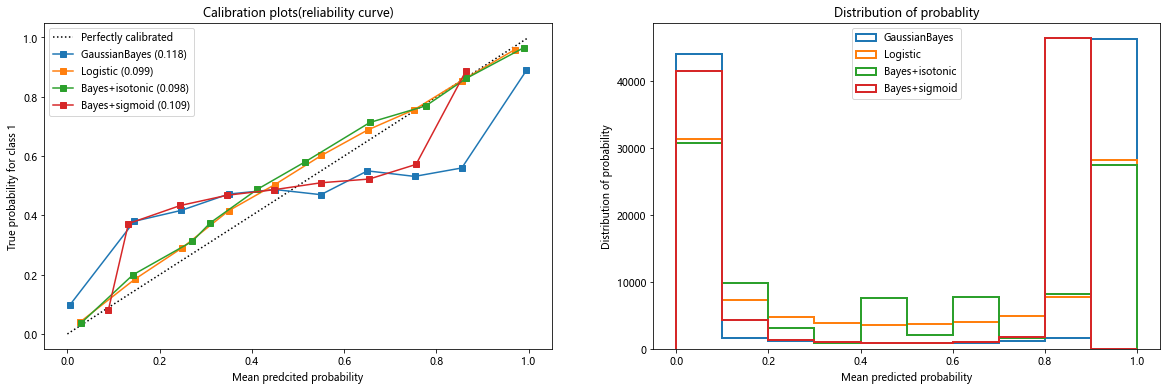

In [ ]:
plot_calib(models,name,Xtrain,Xtest,Ytrain,Ytest)

In [ ]:
gnb = GaussianNB().fit(Xtrain,Ytrain)
gnb.score(Xtest,Ytest)

0.8650606060606061

In [ ]:
brier_score_loss(Ytest,gnb.predict_proba(Xtest)[:,1],pos_label = 1)
gnbisotonic = CalibratedClassifierCV(gnb, cv=2, method='isotonic').fit(Xtrain,Ytrain)
gnbisotonic.score(Xtest,Ytest)

0.8626767676767677

In [ ]:
brier_score_loss(Ytest,gnbisotonic.predict_proba(Xtest)[:,1],pos_label = 1)

0.09833190251353853

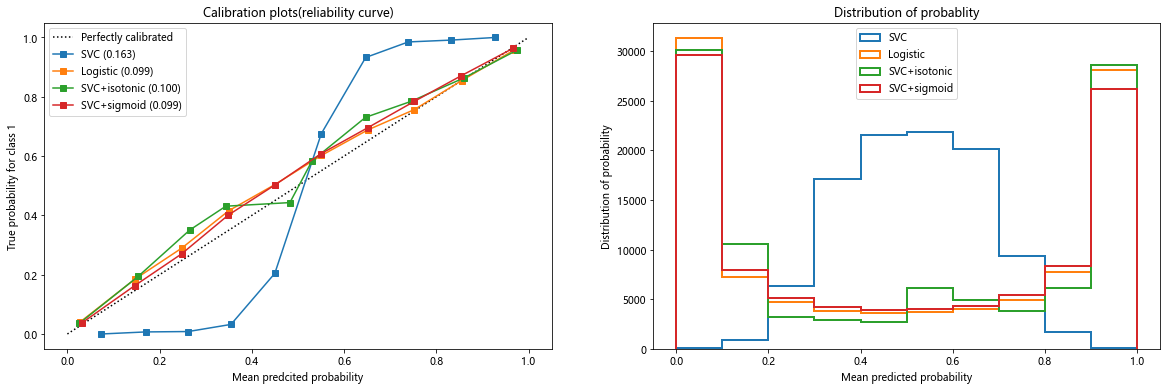

In [ ]:
name_svc = ["SVC","Logistic","SVC+isotonic","SVC+sigmoid"]
svc = SVC(kernel = "linear",gamma=1)
models_svc = [svc
    ,LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto")
        #依然定义两种校准方式
    ,CalibratedClassifierCV(svc, cv=2, method='isotonic')
    ,CalibratedClassifierCV(svc, cv=2, method='sigmoid')]
plot_calib(models_svc,name_svc,Xtrain,Xtest,Ytrain,Ytest)

In [ ]:
name_svc = ["SVC","SVC+isotonic","SVC+sigmoid"]
svc = SVC(kernel = "linear",gamma=1)
models_svc = [svc
     ,CalibratedClassifierCV(svc, cv=2, method='isotonic')
     ,CalibratedClassifierCV(svc, cv=2, method='sigmoid')]
for clf, name in zip(models_svc,name_svc):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:, 1]
    else:
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
    score = clf.score(Xtest,Ytest)
    print("{}:".format(name))
    print("\tBrier:{:.4f}".format(clf_score))
    print("\tAccuracy:{:.4f}".format(score))

SVC:
	Brier:0.1630
	Accuracy:0.8633
SVC+isotonic:
	Brier:0.0999
	Accuracy:0.8639
SVC+sigmoid:
	Brier:0.0987
	Accuracy:0.8634
